In [ ]:
import numpy as np
import pandas as pd
import multiprocessing

import matplotlib.pyplot as plt
import bokeh
import bokeh.io
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

# init_notebook_mode()

import seaborn as sns

import re
import math
import copy

from collections import defaultdict
import csv
import itertools
import datetime 
from datetime import datetime
import time
import dateutil.parser
import pickle
import random

import gc
import zipfile
import sys, getopt
import os

from IPython.core.interactiveshell import InteractiveShell
from io import StringIO

import dask.dataframe as dd
#from chest import Chest

InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last"

# Magic function to make matplotlib inline
%matplotlib inline

%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

import dask.dataframe as ddf
import dask.array as da

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 800)

In [ ]:
dat0 = pd.read_csv('ch4k_df_eu.csv')

In [ ]:
dat = dat0.copy()

In [ ]:
import os
os.getcwd()

In [ ]:
dat.head()
dat.year.unique()
dat.dropna(inplace = True)
dat.shape

In [ ]:
dat = dat[dat.season_net_qty > 250]

In [ ]:
len(set(dat2[dat2.season == 'FW18'].article_number).intersection(set(dat2[dat2.season == 'FW19'].article_number)))

In [ ]:
ref_dat = pd.read_csv('data/dat_ref.csv', low_memory = False, index_col = 0,
                     usecols = ['group_article', 'price_band', 'age_group_descr', 
                                'brand_descr', 'sub_brand_descr',
                                'rmh_retail_department_descr', 'rmh_category_descr', 'rmh_gender_descr',
                                'rmh_retail_section_descr', 'rmh_product_division_descr',
                                'rmh_product_type_descr', 'product_franchise_descr'])

In [ ]:
ref_dat.shape
ref_dat = ref_dat.reset_index().drop_duplicates()[['group_article', 'rmh_product_type_descr']]
ref_dat.shape
ref_dat.head()

In [ ]:
ref_dat.head()

pd.crosstab(index = ref_dat['rmh_product_type_descr'], columns = 'count')

for c in ref_dat.columns:
    d = ref_dat[c].unique()
    print('***', c, '***', d)

In [ ]:
dat2 = pd.merge(dat, ref_dat, left_on='article_number', right_on='group_article', how = 'left')

In [ ]:
# Choose article
a = '015110'
ptd = dat2[dat2.article_number == a]['rmh_product_type_descr'].unique()[0] # product type descriptions

In [ ]:
dat3 = dat2[dat2.rmh_product_type_descr == ptd]

In [ ]:
dat3.shape
dat3.head()

In [ ]:
football_shoes = pd.DataFrame(dat3.groupby(['year', 'week'])['net_qty'].mean())
football_shoes2 = football_shoes.groupby('week').mean() # seasonality guy

In [ ]:
football_shoes.head()
football_shoes2.head()

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]

football_shoes2['MA'] = football_shoes2.net_qty.ewm(alpha = 0.5).mean()
football_shoes2.plot(linewidth = 4)

In [215]:
dat4 = dat2[
    (dat2.article_number == a) & 
    (dat2.country == 'EU') & 
    (dat2.season == 'SS19')
    ].sort_values(['year', 'week'])[2:]

In [216]:
dat4.head()
football_shoes2.head()

,article_number,brand,year,week,country,season,gross_demand_quantity,net_qty,clearance,margin,season_gross_demand_quantity,season_net_qty,buy_availability,cost,price,group_article,rmh_product_type_descr
687855,015110,adidas,2018.0,49.0,EU,SS19,46,39,0.0,78.69,998.0,752.0,1.00,33.91,112.60,015110,FOOTBALL SHOES (FIRM GROUND)
487499,015110,adidas,2018.0,50.0,EU,SS19,39,34,0.0,77.51,998.0,752.0,0.99,33.87,111.38,015110,FOOTBALL SHOES (FIRM GROUND)
606580,015110,adidas,2018.0,51.0,EU,SS19,35,29,0.0,70.07,998.0,752.0,0.83,33.92,103.99,015110,FOOTBALL SHOES (FIRM GROUND)
535997,015110,adidas,2018.0,52.0,EU,SS19,14,10,0.0,75.18,998.0,752.0,0.84,33.87,109.05,015110,FOOTBALL SHOES (FIRM GROUND)
1007835,015110,adidas,2019.0,1.0,EU,SS19,9,5,0.0,72.24,998.0,752.0,0.89,33.79,106.03,015110,FOOTBALL SHOES (FIRM GROUND)


,net_qty,MA
week,,
1.0,22.333613,22.333613
2.0,26.114304,24.854074
3.0,25.386215,25.158155
4.0,20.769276,22.817419
5.0,19.939114,21.331842


In [217]:
dat5 = pd.merge(football_shoes2, dat4, left_index=True, right_on='week')

In [218]:
dat5

,net_qty_x,MA,article_number,brand,year,week,country,season,gross_demand_quantity,net_qty_y,clearance,margin,season_gross_demand_quantity,season_net_qty,buy_availability,cost,price,group_article,rmh_product_type_descr
1007835,22.333613,22.333613,015110,adidas,2019.0,1.0,EU,SS19,9,5,0.0,72.24,998.0,752.0,0.89,33.79,106.03,015110,FOOTBALL SHOES (FIRM GROUND)
184377,26.114304,24.854074,015110,adidas,2019.0,2.0,EU,SS19,15,13,0.0,79.33,998.0,752.0,0.86,33.95,113.28,015110,FOOTBALL SHOES (FIRM GROUND)
113884,25.386215,25.158155,015110,adidas,2019.0,3.0,EU,SS19,28,20,0.0,84.37,998.0,752.0,1.00,33.93,118.30,015110,FOOTBALL SHOES (FIRM GROUND)
65038,20.769276,22.817419,015110,adidas,2019.0,4.0,EU,SS19,12,8,0.0,69.87,998.0,752.0,1.00,33.82,103.69,015110,FOOTBALL SHOES (FIRM GROUND)
655489,19.939114,21.331842,015110,adidas,2019.0,5.0,EU,SS19,27,17,0.0,74.79,998.0,752.0,1.00,33.84,108.63,015110,FOOTBALL SHOES (FIRM GROUND)
21683,18.102735,19.691661,015110,adidas,2019.0,6.0,EU,SS19,19,15,0.0,77.90,998.0,752.0,1.00,33.90,111.80,015110,FOOTBALL SHOES (FIRM GROUND)
822940,20.130727,19.912922,015110,adidas,2019.0,7.0,EU,SS19,27,21,0.0,71.93,998.0,752.0,1.00,33.89,105.82,015110,FOOTBALL SHOES (FIRM GROUND)
492884,18.621287,19.264572,015110,adidas,2019.0,8.0,EU,SS19,18,12,0.0,73.52,998.0,752.0,0.98,33.89,107.41,015110,FOOTBALL SHOES (FIRM GROUND)
898629,17.669579,18.465515,015110,adidas,2019.0,9.0,EU,SS19,20,14,0.0,71.23,998.0,752.0,0.89,33.89,105.12,015110,FOOTBALL SHOES (FIRM GROUND)
682461,19.591258,19.028937,015110,adidas,2019.0,10.0,EU,SS19,34,27,0.0,82.66,998.0,752.0,0.89,33.93,116.59,015110,FOOTBALL SHOES (FIRM GROUND)


In [219]:
import statsmodels.api as sm

mod = sm.OLS(dat5.net_qty_y, dat5.MA, missing='drop') # y = article, x = seasonality
mod_res = mod.fit()

In [220]:
mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              net_qty_y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     157.1
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           2.81e-12
Time:                        15:30:17   Log-Likelihood:                -91.117
No. Observations:                  26   AIC:                             184.2
Df Residuals:                      25   BIC:                             185.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MA             0.8983      0.072     12.533      0.000       0.751       1.046
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.956
Skew:                          -0.377   Prob(JB):                        0.620
Kurtosis:                       2.440   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
dat5['seasonal_impute'] = mod_res.predict()

In [223]:
dat5.head()

,net_qty_x,MA,article_number,brand,year,week,country,season,gross_demand_quantity,net_qty_y,clearance,margin,season_gross_demand_quantity,season_net_qty,buy_availability,cost,price,group_article,rmh_product_type_descr,seasonal_impute
1007835,22.333613,22.333613,015110,adidas,2019.0,1.0,EU,SS19,9,5,0.0,72.24,998.0,752.0,0.89,33.79,106.03,015110,FOOTBALL SHOES (FIRM GROUND),20.061583
184377,26.114304,24.854074,015110,adidas,2019.0,2.0,EU,SS19,15,13,0.0,79.33,998.0,752.0,0.86,33.95,113.28,015110,FOOTBALL SHOES (FIRM GROUND),22.325634
113884,25.386215,25.158155,015110,adidas,2019.0,3.0,EU,SS19,28,20,0.0,84.37,998.0,752.0,1.00,33.93,118.30,015110,FOOTBALL SHOES (FIRM GROUND),22.598781
65038,20.769276,22.817419,015110,adidas,2019.0,4.0,EU,SS19,12,8,0.0,69.87,998.0,752.0,1.00,33.82,103.69,015110,FOOTBALL SHOES (FIRM GROUND),20.496171
655489,19.939114,21.331842,015110,adidas,2019.0,5.0,EU,SS19,27,17,0.0,74.79,998.0,752.0,1.00,33.84,108.63,015110,FOOTBALL SHOES (FIRM GROUND),19.161724


In [206]:
# dat5.rename(columns={"net_qty_y": "article", "net_qty_x": "seasonality_avg"}, inplace=True)

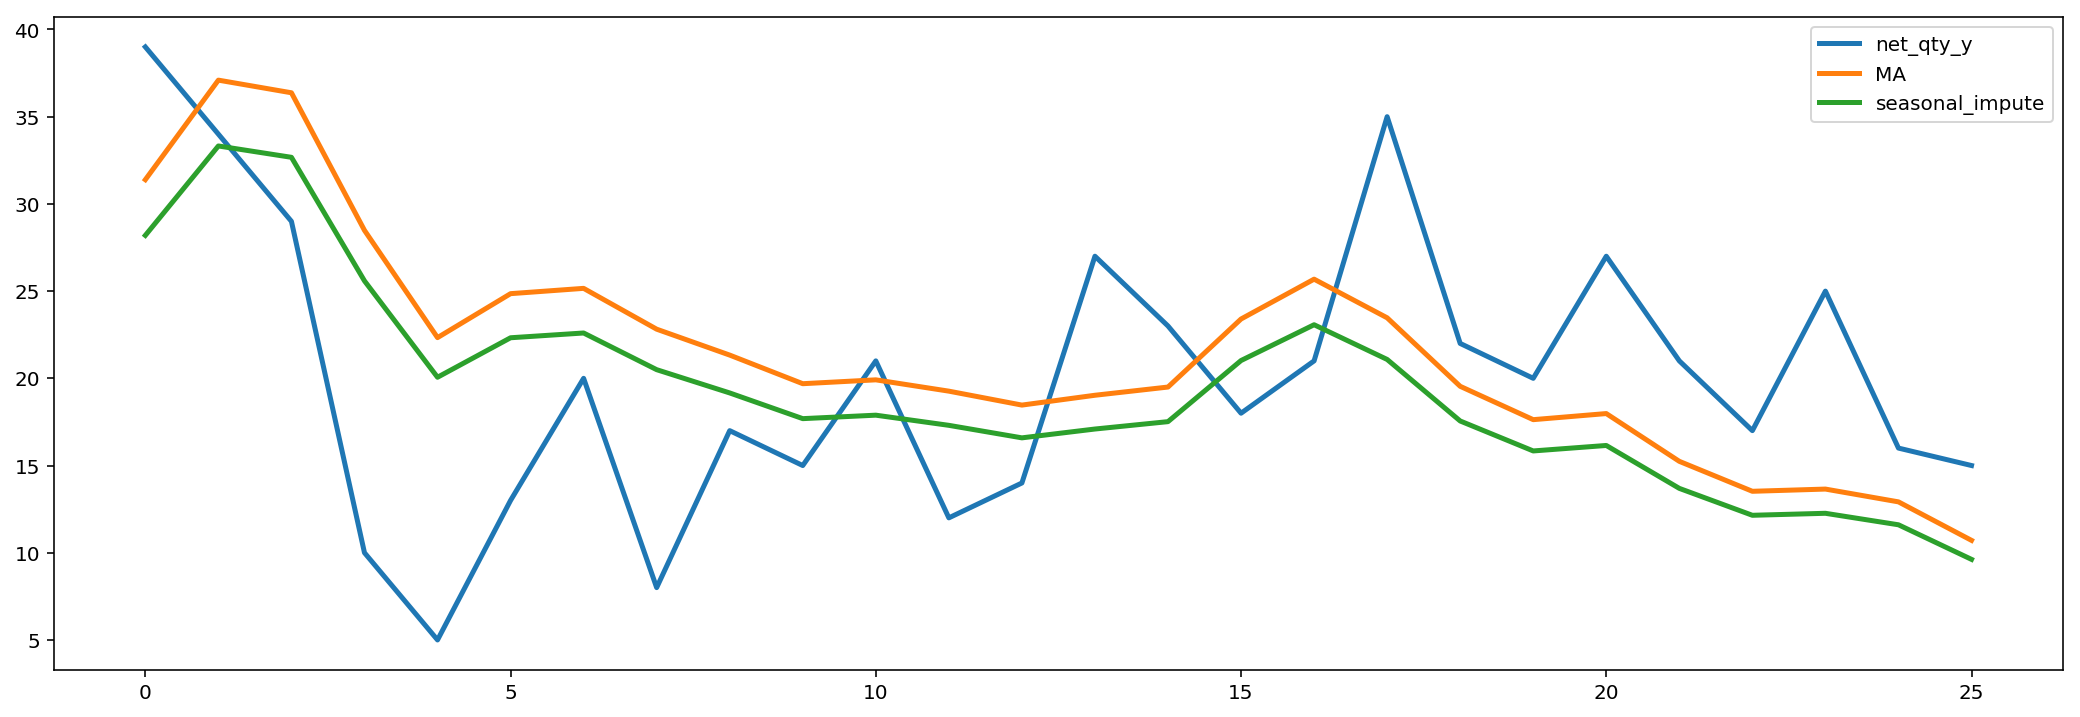

In [224]:
dat5.sort_values(['year', 'week']).reset_index()[['net_qty_y', 'MA', 'seasonal_impute']].plot(linewidth = 2.5)



In [189]:
dat5[['article', 'seasonality_avg', 'seasonal_regr']].mean()

article            19.444444
seasonality_avg    21.512074
seasonal_regr      17.602427
dtype: float64

## Plots

In [ ]:
article = 'G27706'

d = dat[dat['article_number'] == article][['consumer_order_date', 'article_number', 'buy_availability', 'gross_demand_quantity']]

pivoted = d.pivot(index = 'consumer_order_date', columns = 'article_number', values = 'buy_availability')

pivoted2 = d.pivot(index = 'consumer_order_date', columns = 'article_number', values = 'gross_demand_quantity')    

forecasts[forecasts.index == article].round()

d.round(2)
d.gross_demand_quantity.sum()

plt.rcParams["figure.figsize"] = [18,6]

pivoted.plot(linewidth = 4)
plt.title('Buy Availability Over Time')
plt.ylabel('Buy Availability')

pivoted2.plot(linewidth = 4)
plt.title('Weekly Gross Demand Quantity')
plt.ylabel('Gross Demand Quantity')



In [ ]:
d

In [ ]:
forecasts.sort_values('cost', ascending = False)

In [ ]:
# Appendix

In [ ]:
# B37616, B28129, B28128

In [ ]:

# # ---- Add cost ----
# cost_price = pd.read_csv('Cost Price.csv', low_memory=False, index_col = 0)
# cost_price.rename(columns = {'avg(cost_of_sales)': 'cost'}, inplace = True)
# cost_price = pd.DataFrame(cost_price['cost'].groupby(cost_price.index).mean()).round()


In [ ]:
# dat.drop(['plant', 'warehouse'], axis = 1, inplace=True)

# dat.buy_availability = dat.buy_availability.round(2)

# dat.drop_duplicates(['article_number', 'consumer_order_date'], inplace = True)

# dat[dat.duplicated()]